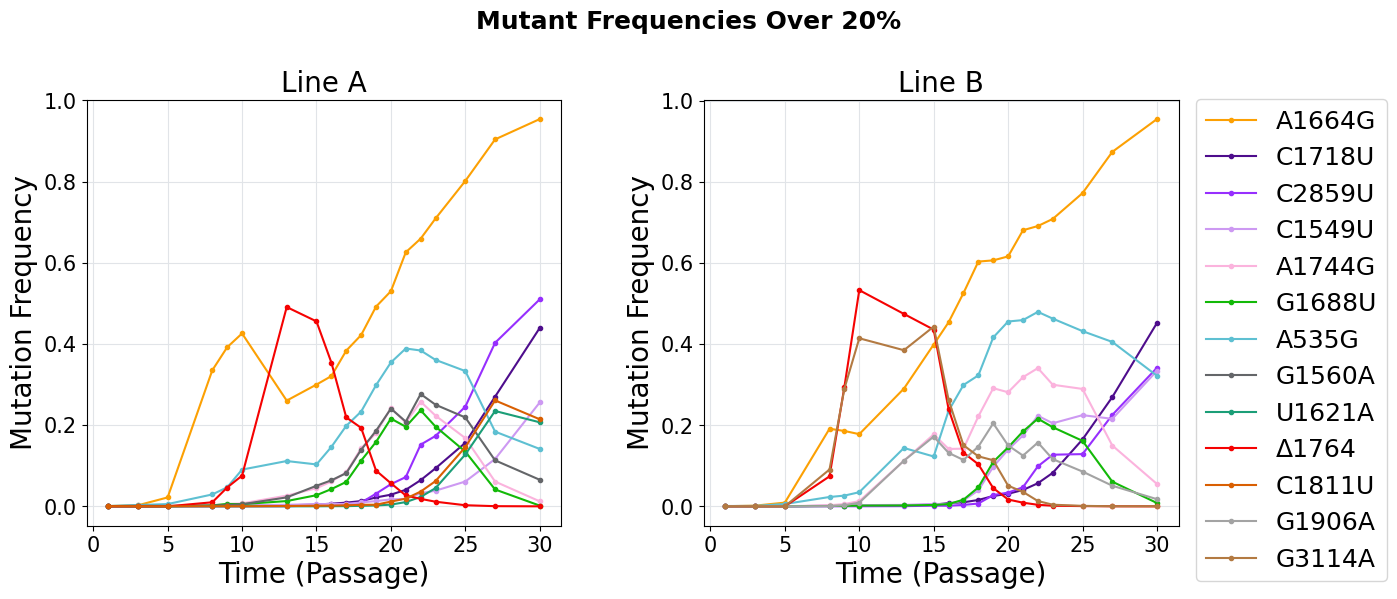

In [1]:
# line plot of serial passaging MOI 1

import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from itertools import combinations
import re

# a function that creates line plots
def plot_exp(mut_passages, ax, freq_cutoff, passage_list, name):
    line_a = mut_passages.loc[mut_passages["Replica"] == "A", :]
    line_b = mut_passages.loc[mut_passages["Replica"] == "B", :]

    mutation_list = list(mut_passages.Full_mutation.drop_duplicates())
    colors = {'T1764.0-': '#F50202',
             'A1664.0G': '#fca003',
             'A535.0G': '#5EC0D2',
             'T1440.0C': '#F1F87A',
             'T1440.0G': '#bfbb71',
             'A1443.0G': '#731f1f',
             'A1611.0G': '#6988b8',
             'C1724.0T': '#8FD95A',
             'A1744.0G': '#FBB3DD',
             'G1906.0A': '#A3A3A3',
             'C3358.0T': '#26451C',
             'G3114.0A': '#B37A42',
             'A1770.0G': '#b3b2ad',
             'G2310.0A': '#033E86',
             'A2626.0G': '#8FD95A',
             'C3299.0T': '#211785',
             'C1718.0T': '#4e0d8c',
             'T862.0C': '#880E05',
             'A2790.0T': '#DF36C6',
             'G1736.0A': '#CFFD2F',
             'C1549.0T': '#cd99f2',
             'G531.0A': '#DFC236',
             'C1050.0T': '#0D2291',
             'G1688.0T': '#13B908',
             'A2356.0G': '#2d16f7',
             'T170.0A': '#C60DC3',
             'A1673.0G': '#E2D492',
             'C2859.0T': '#972FFE',
             'T21.0C': 'grey',
             'T323.0A': 'black',
             'G2317.0A': '#E4CEFD',
             'C3378.0T': '#828282',
             'C1735.0T': '#AFF31E',
             'G1560.0A': '#646669',
             'T1829.0C': '#147040',
             'A2731.0G': '#B0F7FF',
             'G710.0A': "#ad8f61", 
             'C1056.0T': "#bd099f", 
             'A784.0G': "#875408", 
             'A1520.0G': "#92bf91",
             'A1829.0G': "#6e465a"}

    handles1, labels1 = plot_line(line_a, "A", mutation_list, ax[0], colors, passage_list, name)
    handles2, labels2 = plot_line(line_b, "B", mutation_list, ax[1], colors, passage_list, name)
    handles = handles1 + handles2
    labels = labels1 + labels2
    return handles, labels


# this creates a subplot per line
def plot_line(line_data, line, mutation_list, ax, colors, passage_list, name):
    no_color = [mut for mut in mutation_list if mut not in colors]
    extra_colors = generate_colors(no_color)
    # added to set the legend order
    legend_order = ["A1664.0G", "C1718.0T", "C2859.0T", "C1549.0T", "A1744.0G", "T1829.0C", "G1688.0T", "C1735.0T", "A535.0G"]
    muts = []
    for mut in legend_order:
        if mut in mutation_list:
            muts.append(mut)
    for mut in mutation_list:
        if mut not in legend_order:
            muts.append(mut)
    #plot mutations
    for mutation in muts:
        mut_data = line_data.loc[line_data["Full_mutation"] == mutation, :]
        if not mut_data.empty:
            yvalues = mut_data.iloc[0, 2:].to_list()
            if mutation in colors:
                ax.plot(passage_list, yvalues, label=mutation, marker=".", color=colors[mutation])
            else:
                ax.plot(passage_list, yvalues, label=mutation, marker=".", color=extra_colors[mutation])
    ax.set_xlabel('Time (Passage)', fontsize=20)
    ax.set_ylabel('Mutation Frequency', fontsize=20)
    ax.set_title('Line {}'.format(line), fontsize=20)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_facecolor("white")
    ax.grid(color='#e1e4e8')
    handles, labels = ax.get_legend_handles_labels()
    return handles, labels


# This function assigns a color to each mutation not in the color dictionary
def generate_colors(mut_list):
    cmap_b = matplotlib.colormaps['Dark2']  # Choose 'tab20b' colormap with 20 colors
    cmap_c = matplotlib.colormaps['Set2']  # Choose 'tab20c' colormap with 20 colors
    color_mapping = {}
    for i, mutation in enumerate(mut_list):
        if i < cmap_b.N:
            color = cmap_b(i % cmap_b.N)
        else:
            color = cmap_c((i - cmap_b.N) % cmap_c.N)
        color_mapping[mutation] = color
    return color_mapping


if __name__ == "__main__":

    freq_cutoff = 0.2       # mutation frequency cutoff
    input_path = r"/sternadi/home/volume3/arielle_k/for_adi/ravit/passages_{}freq.csv".format(freq_cutoff)
    output_path = r"/sternadi/home/volume3/arielle_k/for_adi/paper_2024/"


    ravit = pd.read_csv(input_path)
    passages = [1, 3, 5, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30]
    # Create and modify figure params 
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), facecolor="white")
    handles2, labels2 = plot_exp(ravit, ax, freq_cutoff, passages, "Ravit")
    handles = handles2
    labels3 = labels2
    labels = [item.replace(".0", "").replace("T", "U") for item in labels3]
    legend_params = pd.DataFrame({"handles": handles, "labels": labels}).drop_duplicates("labels")
    labels = legend_params["labels"].to_list()
    handles = legend_params["handles"].to_list()
    rep_index = labels.index("U1764-")
    labels[rep_index] = "Δ1764"
    legend_params = pd.DataFrame({"handles": handles, "labels": labels}).drop_duplicates("labels")
    plt.legend(list(legend_params["handles"]), list(legend_params["labels"]), bbox_to_anchor=(1.01, 1.03),
               loc='upper left', fontsize=18)
    plt.subplots_adjust(left=0.07, right=0.85, top=0.83, bottom=0.12, wspace=0.3)
    plt.suptitle("Mutant Frequencies Over {}%".format(int(freq_cutoff * 100)), fontsize=18, fontweight="bold")
    plot_path = os.path.join(output_path, r"ravit_line_plot_{}freq.png".format(freq_cutoff))
    plt.savefig(plot_path)
    plt.show()
